# WeatherPy

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from api_keys import weather_api_key

from citipy import citipy

In [2]:
lat_lngs = []
cities = []

lat_range = (-90, 90)
lng_range = (-180, 180)

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1
    
    try:
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao gabriel da cachoeira
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | alofi
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | lakhnadon
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | kathu
Processing Record 9 of Set 1 | liku
Processing Record 10 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | vytegra
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | clonakilty
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | upernavik
Processing Record 20 of Set 1 | avera
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | kapaa
Processing R

Processing Record 41 of Set 4 | mar del plata
Processing Record 42 of Set 4 | tura
Processing Record 43 of Set 4 | honiara
Processing Record 44 of Set 4 | narsaq
Processing Record 45 of Set 4 | jericho
Processing Record 46 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 47 of Set 4 | shambu
Processing Record 48 of Set 4 | nanortalik
Processing Record 49 of Set 4 | clyde river
Processing Record 0 of Set 5 | kampong thum
Processing Record 1 of Set 5 | rungata
City not found. Skipping...
Processing Record 2 of Set 5 | umm lajj
Processing Record 3 of Set 5 | bastrop
Processing Record 4 of Set 5 | luau
Processing Record 5 of Set 5 | saint george
Processing Record 6 of Set 5 | kamenka
Processing Record 7 of Set 5 | banjar
Processing Record 8 of Set 5 | luderitz
Processing Record 9 of Set 5 | gornyy
Processing Record 10 of Set 5 | klaksvik
Processing Record 11 of Set 5 | padang
Processing Record 12 of Set 5 | hvolsvollur
Processing Record 13 of Set 5 | beringovskiy
Proces

Processing Record 29 of Set 8 | puerto escondido
Processing Record 30 of Set 8 | xiaoyi
Processing Record 31 of Set 8 | sao jose da coroa grande
Processing Record 32 of Set 8 | bossangoa
Processing Record 33 of Set 8 | pierre
Processing Record 34 of Set 8 | samarai
Processing Record 35 of Set 8 | bambous virieux
Processing Record 36 of Set 8 | mountain home
Processing Record 37 of Set 8 | tommot
Processing Record 38 of Set 8 | utrecht
Processing Record 39 of Set 8 | jaque
Processing Record 40 of Set 8 | makakilo city
Processing Record 41 of Set 8 | bilibino
Processing Record 42 of Set 8 | rio verde de mato grosso
Processing Record 43 of Set 8 | harper
Processing Record 44 of Set 8 | olga
Processing Record 45 of Set 8 | saquena
Processing Record 46 of Set 8 | okmulgee
Processing Record 47 of Set 8 | marienburg
Processing Record 48 of Set 8 | bereda
Processing Record 49 of Set 8 | lata
Processing Record 0 of Set 9 | bullingen
City not found. Skipping...
Processing Record 1 of Set 9 | lub

Processing Record 19 of Set 12 | bixby
Processing Record 20 of Set 12 | pacific grove
Processing Record 21 of Set 12 | nelson bay
Processing Record 22 of Set 12 | pangody
Processing Record 23 of Set 12 | baruun-urt
Processing Record 24 of Set 12 | anloga
Processing Record 25 of Set 12 | yellapur
Processing Record 26 of Set 12 | hokitika
Processing Record 27 of Set 12 | yangmei
Processing Record 28 of Set 12 | college
Processing Record 29 of Set 12 | nicoya
Processing Record 30 of Set 12 | haines junction
Processing Record 31 of Set 12 | tilichiki
Processing Record 32 of Set 12 | falealupo
City not found. Skipping...
Processing Record 33 of Set 12 | kendari
Processing Record 34 of Set 12 | kavaratti
Processing Record 35 of Set 12 | mayor pablo lagerenza
Processing Record 36 of Set 12 | panama city
Processing Record 37 of Set 12 | kangaatsiaq
Processing Record 38 of Set 12 | sehithwa
Processing Record 39 of Set 12 | utiroa
City not found. Skipping...
Processing Record 40 of Set 12 | maca

In [4]:
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [5]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sao gabriel da cachoeira,-0.1303,-67.0892,23.72,91,74,0.49,BR,1675295928
1,cidreira,-30.1811,-50.2056,24.84,87,1,3.58,BR,1675295928
2,alofi,-19.0595,-169.9187,24.94,94,100,6.17,NU,1675295929
3,port elizabeth,-33.9180,25.5701,19.06,88,0,4.12,ZA,1675295737
4,dikson,73.5069,80.5464,-19.17,92,94,3.78,RU,1675295929


In [6]:
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao gabriel da cachoeira,-0.1303,-67.0892,23.72,91,74,0.49,BR,1675295928
1,cidreira,-30.1811,-50.2056,24.84,87,1,3.58,BR,1675295928
2,alofi,-19.0595,-169.9187,24.94,94,100,6.17,NU,1675295929
3,port elizabeth,-33.9180,25.5701,19.06,88,0,4.12,ZA,1675295737
4,dikson,73.5069,80.5464,-19.17,92,94,3.78,RU,1675295929


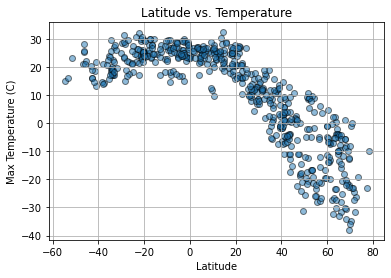

In [8]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],marker="o",edgecolors="black",alpha=0.5)
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

plt.savefig("output_data/Fig1.png")
plt.show()

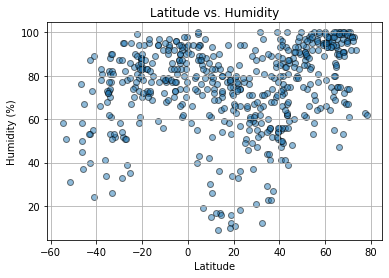

In [9]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],marker="o",edgecolors="black",alpha=0.5)
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("output_data/Fig2.png")
plt.show()

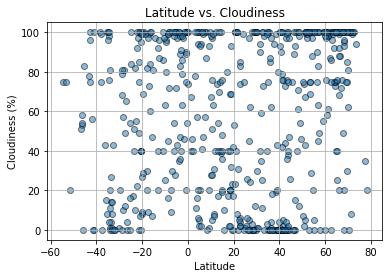

In [10]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],marker="o",edgecolors="black",alpha=0.5)
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("output_data/Fig3.png")
plt.show()

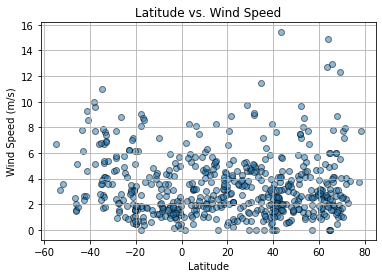

In [11]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],marker="o",edgecolors="black",alpha=0.5)
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

plt.savefig("output_data/Fig4.png")
plt.show()

In [59]:
def plotter(x,y,a,b):
    plt.scatter(x,y,marker="o",edgecolors="black",alpha=0.5)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    print(f"The r-value is: {rvalue}")

In [60]:
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']>=0,:])
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,dikson,73.5069,80.5464,-19.17,92,94,3.78,RU,1675295929
5,lakhnadon,22.6000,79.6000,10.40,36,2,2.20,IN,1675295930
6,qaanaaq,77.4840,-69.3632,-23.02,63,35,3.75,GL,1675295930
7,kathu,7.9178,98.3332,22.90,82,87,2.54,TH,1675295930
11,albany,42.6001,-73.9662,-4.24,56,44,2.32,US,1675295714


In [61]:
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']<0,:])
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,dikson,73.5069,80.5464,-19.17,92,94,3.78,RU,1675295929
5,lakhnadon,22.6000,79.6000,10.40,36,2,2.20,IN,1675295930
6,qaanaaq,77.4840,-69.3632,-23.02,63,35,3.75,GL,1675295930
7,kathu,7.9178,98.3332,22.90,82,87,2.54,TH,1675295930
11,albany,42.6001,-73.9662,-4.24,56,44,2.32,US,1675295714


# Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8674089535859898


Text(0, 0.5, 'Max Temp')

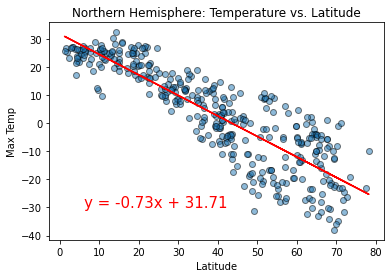

In [63]:
plotter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],6,-30)
plt.title("Northern Hemisphere: Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

The r-value is: 0.3878274016467644


Text(0, 0.5, 'Max Temp')

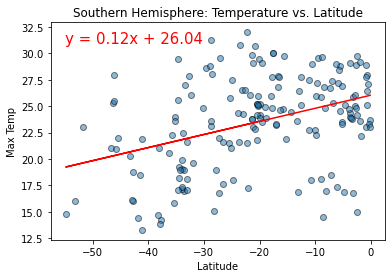

In [64]:
plotter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],-55,31)
plt.title("Southern Hemisphere: Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

In the Northern Hemisphere there is a strong negative correlation between temperature and latitude, while in the Southern Hemisphere there is a weak positive correlation between the two.

# Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3790491727011786


Text(0, 0.5, 'Humidity')

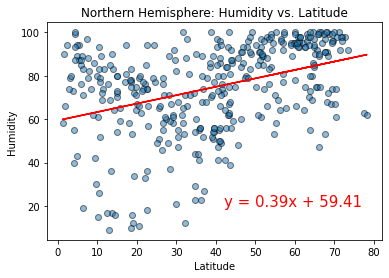

In [65]:
plotter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],42,20)
plt.title("Northern Hemisphere: Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

The r-value is: 0.5083982658665519


Text(0, 0.5, 'Humidity')

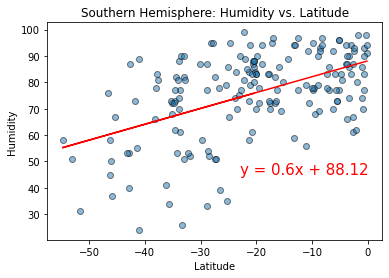

In [67]:
plotter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],-23,45)
plt.title("Southern Hemisphere: Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

In the Northern Hemisphere there is a weak positive correlation between humidity and latitude, while in the Southern Hemisphere there is a moderate positive correlation between the two.

# Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2664879919137849


Text(0, 0.5, 'Cloudiness')

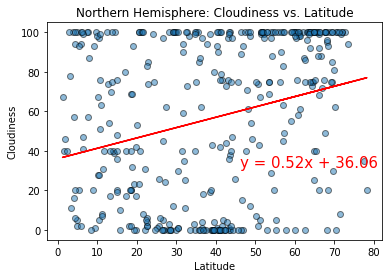

In [66]:
plotter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],46,32)
plt.title("Northern Hemisphere: Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

The r-value is: 0.2980203607087004


Text(0, 0.5, 'Cloudiness')

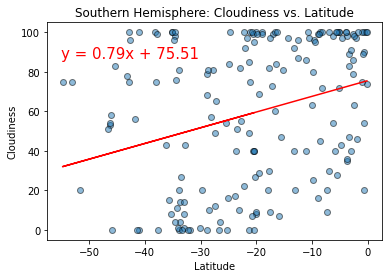

In [68]:
plotter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],-55,87)
plt.title("Southern Hemisphere: Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

In both the Northern and Southern Hemispheres there is a very weak positive correlation between cloudiness and latitude.

# Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03438853822009925


Text(0, 0.5, 'Wind Speed')

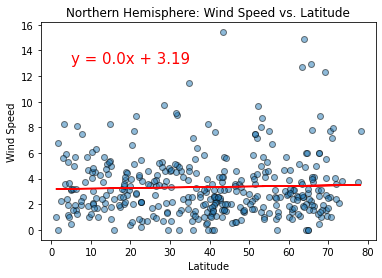

In [69]:
plotter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],5,13)
plt.title("Northern Hemisphere: Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

The r-value is: -0.3845421588686537


Text(0, 0.5, 'Wind Speed')

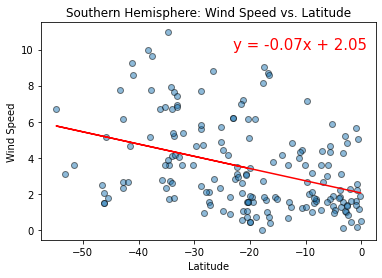

In [70]:
plotter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],-23,10)
plt.title("Southern Hemisphere: Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

In the Northern Hemisphere there is a weak positive correlation between wind speed and latitude, while in the Southern Hemisphere there is a weak negative correlation between the two.